In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
import tensorflow as tf

In [3]:
data = pd.read_excel("UW Data All Years cleaned.xlsx")
data.head()

,Year,Station Code,Station Name,State,Min Temperature,Max Temperature,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min NitrateN + NitriteN,Max NitrateN + NitriteN,Min Faecal Coli form,Max Faecal Coli form,Min Total Coli form,Max Total Coli form
0,2016,26,WELL AT VIJAYWADA,ANDHRA PRADESH,22.0,26.0,7.51,8.03,960.0,1418.0,0.8,1.2,2.7,4.6,2.0,2.0,400.0,400.0
1,2016,1513,"BORE WELL. KRISHNA MURTHY, D.NO. 481643\nAUTO...",ANDHRA PRADESH,23.0,26.0,7.70,8.00,1214.0,1260.0,0.8,1.2,0.0,1.9,2.0,2.0,400.0,400.0
2,2016,1514,"BORE WELL VIJAY KUMAR AUTONAGAR\nVIJAYAWADA, ...",ANDHRA PRADESH,23.0,23.0,7.40,8.00,1010.0,1427.0,0.8,1.2,0.2,1.1,2.0,2.0,400.0,400.0
3,2016,1516,BORE WELL OF NAVLOK GARDENS NELLORE,ANDHRA PRADESH,26.0,28.0,8.50,8.60,557.0,670.0,0.8,1.2,0.5,0.6,2.0,2.0,400.0,400.0
4,2016,1517,BORE WELL. TUNGBHADRA RIVER NEAR\nKURNOOL,ANDHRA PRADESH,23.0,29.0,7.60,7.90,4060.0,4220.0,0.7,1.0,2.1,2.6,2.0,2.0,18.0,18.0


In [4]:
data.describe()

,Year,Station Code,Min Temperature,Max Temperature,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min NitrateN + NitriteN,Max NitrateN + NitriteN,Min Faecal Coli form,Max Faecal Coli form,Min Total Coli form,Max Total Coli form
count,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000,4103.000000
mean,2018.273215,2697.611016,25.445162,27.500219,7.157141,7.514402,1166.645918,1537.004387,1.047175,1.654158,4.467777,20.473266,27.214063,124.583086,46.957636,100.677499
std,1.418235,956.047323,4.485623,4.242515,0.670693,0.682468,1903.249426,2368.967677,1.967045,3.897315,40.215816,280.939790,179.776128,2193.315799,399.097743,1114.543506
min,2016.000000,3.000000,0.000000,6.000000,2.800000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1935.000000,24.000000,26.000000,6.900000,7.200000,286.500000,408.000000,0.200000,0.500000,0.340000,0.700000,2.000000,2.000000,0.155000,0.820000
50%,2018.000000,2584.000000,26.000000,28.000000,7.200000,7.500000,683.000000,905.500000,0.800000,1.200000,1.845000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2020.000000,3365.000000,28.000000,30.000000,7.600000,7.900000,1376.500000,1751.500000,1.200000,1.800000,2.000000,3.000000,3.000000,4.000000,3.100000,6.085000
max,2020.000000,4912.000000,66.000000,69.000000,9.600000,26.200000,43000.000000,45000.000000,53.000000,160.000000,1600.000000,9200.000000,4900.000000,92000.000000,17000.000000,63000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4103 entries, 0 to 4102
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4103 non-null   int64  
 1   Station Code             4103 non-null   int64  
 2   Station Name             4103 non-null   object 
 3   State                    4103 non-null   object 
 4   Min Temperature          4103 non-null   float64
 5   Max Temperature          4103 non-null   float64
 6   Min pH                   4103 non-null   float64
 7   Max pH                   4103 non-null   float64
 8   Min Conductivity         4103 non-null   float64
 9   Max Conductivity         4103 non-null   float64
 10  Min BOD                  4103 non-null   float64
 11  Max BOD                  4103 non-null   float64
 12  Min NitrateN + NitriteN  4103 non-null   float64
 13  Max NitrateN + NitriteN  4103 non-null   float64
 14  Min Faecal Coli form    

In [6]:
data.isnull().sum()

Year                       0
Station Code               0
Station Name               0
State                      0
Min Temperature            0
Max Temperature            0
Min pH                     0
Max pH                     0
Min Conductivity           0
Max Conductivity           0
Min BOD                    0
Max BOD                    0
Min NitrateN + NitriteN    0
Max NitrateN + NitriteN    0
Min Faecal Coli form       0
Max Faecal Coli form       0
Min Total Coli form        0
Max Total Coli form        0
dtype: int64

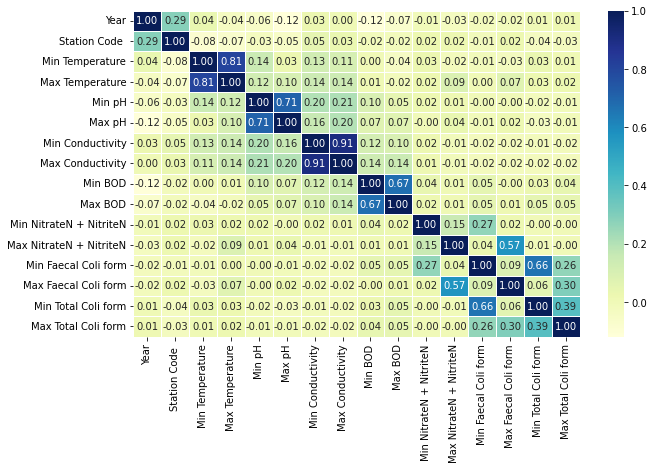

In [7]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [8]:
# Find the columns which contain strings
# data_temp.items() treats the data like dict where keys are col names and values are the values corresponding to each key
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Station Name
State


In [9]:
# This will convert all strings to category
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        if label!="Date":
            data[label] = content.astype("category").cat.as_ordered()    # assigns a numeric value to each category

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4103 entries, 0 to 4102
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Year                     4103 non-null   int64   
 1   Station Code             4103 non-null   int64   
 2   Station Name             4103 non-null   category
 3   State                    4103 non-null   category
 4   Min Temperature          4103 non-null   float64 
 5   Max Temperature          4103 non-null   float64 
 6   Min pH                   4103 non-null   float64 
 7   Max pH                   4103 non-null   float64 
 8   Min Conductivity         4103 non-null   float64 
 9   Max Conductivity         4103 non-null   float64 
 10  Min BOD                  4103 non-null   float64 
 11  Max BOD                  4103 non-null   float64 
 12  Min NitrateN + NitriteN  4103 non-null   float64 
 13  Max NitrateN + NitriteN  4103 non-null   float64 
 14  Min Faec

In [11]:
data['StateCodes'] = data.State.cat.codes
data.head()

,Year,Station Code,Station Name,State,Min Temperature,Max Temperature,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min NitrateN + NitriteN,Max NitrateN + NitriteN,Min Faecal Coli form,Max Faecal Coli form,Min Total Coli form,Max Total Coli form,StateCodes
0,2016,26,WELL AT VIJAYWADA,ANDHRA PRADESH,22.0,26.0,7.51,8.03,960.0,1418.0,0.8,1.2,2.7,4.6,2.0,2.0,400.0,400.0,0
1,2016,1513,"BORE WELL. KRISHNA MURTHY, D.NO. 481643\nAUTO...",ANDHRA PRADESH,23.0,26.0,7.70,8.00,1214.0,1260.0,0.8,1.2,0.0,1.9,2.0,2.0,400.0,400.0,0
2,2016,1514,"BORE WELL VIJAY KUMAR AUTONAGAR\nVIJAYAWADA, ...",ANDHRA PRADESH,23.0,23.0,7.40,8.00,1010.0,1427.0,0.8,1.2,0.2,1.1,2.0,2.0,400.0,400.0,0
3,2016,1516,BORE WELL OF NAVLOK GARDENS NELLORE,ANDHRA PRADESH,26.0,28.0,8.50,8.60,557.0,670.0,0.8,1.2,0.5,0.6,2.0,2.0,400.0,400.0,0
4,2016,1517,BORE WELL. TUNGBHADRA RIVER NEAR\nKURNOOL,ANDHRA PRADESH,23.0,29.0,7.60,7.90,4060.0,4220.0,0.7,1.0,2.1,2.6,2.0,2.0,18.0,18.0,0


In [12]:
data = data.drop(columns=["State"])
data.head()

,Year,Station Code,Station Name,Min Temperature,Max Temperature,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min NitrateN + NitriteN,Max NitrateN + NitriteN,Min Faecal Coli form,Max Faecal Coli form,Min Total Coli form,Max Total Coli form,StateCodes
0,2016,26,WELL AT VIJAYWADA,22.0,26.0,7.51,8.03,960.0,1418.0,0.8,1.2,2.7,4.6,2.0,2.0,400.0,400.0,0
1,2016,1513,"BORE WELL. KRISHNA MURTHY, D.NO. 481643\nAUTO...",23.0,26.0,7.70,8.00,1214.0,1260.0,0.8,1.2,0.0,1.9,2.0,2.0,400.0,400.0,0
2,2016,1514,"BORE WELL VIJAY KUMAR AUTONAGAR\nVIJAYAWADA, ...",23.0,23.0,7.40,8.00,1010.0,1427.0,0.8,1.2,0.2,1.1,2.0,2.0,400.0,400.0,0
3,2016,1516,BORE WELL OF NAVLOK GARDENS NELLORE,26.0,28.0,8.50,8.60,557.0,670.0,0.8,1.2,0.5,0.6,2.0,2.0,400.0,400.0,0
4,2016,1517,BORE WELL. TUNGBHADRA RIVER NEAR\nKURNOOL,23.0,29.0,7.60,7.90,4060.0,4220.0,0.7,1.0,2.1,2.6,2.0,2.0,18.0,18.0,0


In [13]:
data = data.drop(columns=["Station Name"])
data.head()

,Year,Station Code,Min Temperature,Max Temperature,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min NitrateN + NitriteN,Max NitrateN + NitriteN,Min Faecal Coli form,Max Faecal Coli form,Min Total Coli form,Max Total Coli form,StateCodes
0,2016,26,22.0,26.0,7.51,8.03,960.0,1418.0,0.8,1.2,2.7,4.6,2.0,2.0,400.0,400.0,0
1,2016,1513,23.0,26.0,7.70,8.00,1214.0,1260.0,0.8,1.2,0.0,1.9,2.0,2.0,400.0,400.0,0
2,2016,1514,23.0,23.0,7.40,8.00,1010.0,1427.0,0.8,1.2,0.2,1.1,2.0,2.0,400.0,400.0,0
3,2016,1516,26.0,28.0,8.50,8.60,557.0,670.0,0.8,1.2,0.5,0.6,2.0,2.0,400.0,400.0,0
4,2016,1517,23.0,29.0,7.60,7.90,4060.0,4220.0,0.7,1.0,2.1,2.6,2.0,2.0,18.0,18.0,0


# Modelling

In [14]:
X = data.drop(columns=["Max Total Coli form"])
y = data["Max Total Coli form"]
X.head()

,Year,Station Code,Min Temperature,Max Temperature,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min NitrateN + NitriteN,Max NitrateN + NitriteN,Min Faecal Coli form,Max Faecal Coli form,Min Total Coli form,StateCodes
0,2016,26,22.0,26.0,7.51,8.03,960.0,1418.0,0.8,1.2,2.7,4.6,2.0,2.0,400.0,0
1,2016,1513,23.0,26.0,7.70,8.00,1214.0,1260.0,0.8,1.2,0.0,1.9,2.0,2.0,400.0,0
2,2016,1514,23.0,23.0,7.40,8.00,1010.0,1427.0,0.8,1.2,0.2,1.1,2.0,2.0,400.0,0
3,2016,1516,26.0,28.0,8.50,8.60,557.0,670.0,0.8,1.2,0.5,0.6,2.0,2.0,400.0,0
4,2016,1517,23.0,29.0,7.60,7.90,4060.0,4220.0,0.7,1.0,2.1,2.6,2.0,2.0,18.0,0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model1.fit(X_train,y_train)
y_preds1 = model1.predict(X_test)
y_preds1

array([3.6452000e+00, 2.0986800e+01, 1.5426000e+02, 1.9921000e+00,
       3.4000000e-01, 3.6031000e+00, 6.6971000e+00, 2.2785149e+03,
       2.0000000e+00, 8.0000000e-02, 0.0000000e+00, 1.9672000e+00,
       3.0075000e+00, 2.7972000e+00, 3.0604000e+00, 2.0000000e+00,
       2.0000000e+00, 3.9894300e+01, 1.3520600e+01, 5.3170000e+02,
       2.0000000e+00, 1.5775000e+00, 2.0544000e+02, 2.0000000e+00,
       2.0000000e+00, 1.8320340e+02, 5.7800000e-01, 1.5400000e-02,
       8.1996000e+00, 1.6876000e+00, 6.5381500e+01, 2.0000000e+00,
       5.0614000e+01, 2.4798000e+00, 1.0462000e+02, 5.0068000e+00,
       6.8910000e-01, 9.7270000e-01, 1.0928000e+00, 0.0000000e+00,
       2.0000000e+00, 8.1800000e+01, 2.6308000e+00, 1.2035000e+00,
       0.0000000e+00, 6.3087000e+00, 2.0000000e+00, 3.1870000e-01,
       2.0000000e+00, 2.0200000e+00, 2.0000000e+00, 7.6000000e-01,
       2.5300000e-01, 6.0000000e-02, 2.0000000e+00, 0.0000000e+00,
       2.0000000e+00, 3.8230000e+00, 6.9710000e-01, 4.9701000e

In [17]:
accuracy = model1.score(X_test,y_test)
print(accuracy*100,"%")

44.94097803975032 %


### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.25068028186067204

### Ridge Regression

In [19]:
from sklearn.linear_model import Ridge
model3 = Ridge(random_state=42)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.25068808802822906

### Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor(random_state=42)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

0.6885329173192054

### XG Boost

In [21]:
import xgboost as xgb

model5 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)               

0.6885329173192054

In [22]:
y_preds_4 = model4.predict(X)
scores_4 = pd.DataFrame(columns=["Actual Max Total Coli form","Predicted Max Total Coli form"])
scores_4["Actual Max Total Coli form"] = y
scores_4["Predicted Max Total Coli form"] = y_preds_4
scores_4.head(10)


,Actual Max Total Coli form,Predicted Max Total Coli form
0,400.0,455.119992
1,400.0,454.764251
2,400.0,454.764251
3,400.0,484.166885
4,18.0,55.343875
5,16.0,55.699616
6,16.0,58.058253
7,16.0,55.343875
8,460.0,431.135163
9,150.0,151.885996


Text(0, 0.5, 'Max Total Coli form')

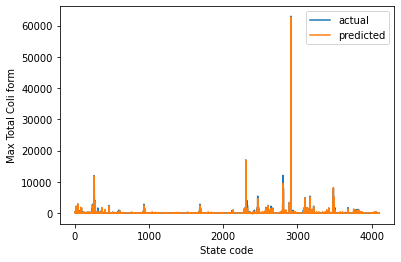

In [23]:
plt.plot(scores_4["Actual Max Total Coli form"], label='actual')
plt.plot(scores_4["Predicted Max Total Coli form"], label='predicted')
plt.legend()
plt.xlabel("State code")
plt.ylabel("Max Total Coli form")

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse= mean_squared_error(y, y_preds_4)
rmse= r2_score(y, y_preds_4)
mae = mean_absolute_error(y,y_preds_4)

mse,rmse,mae

(13347.668602159927, 0.9892522581873737, 27.14316021861341)

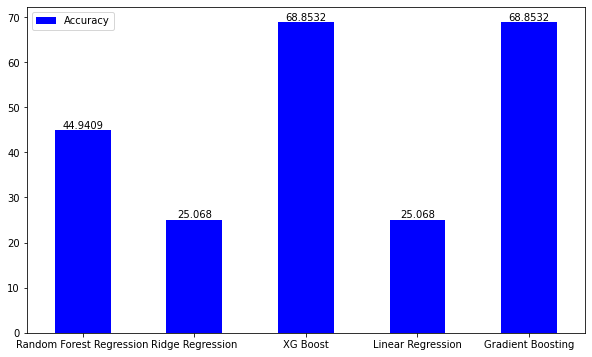

In [25]:
model_score = {'Random Forest Regression':44.9409,
                'Ridge Regression':25.068,
               'XG Boost':68.8532,
               'Linear Regression':25.068,
               'Gradient Boosting':68.8532
               }

model_compare = pd.DataFrame(model_score, index=["Accuracy"])
ax = model_compare.T.plot.bar(color="blue", figsize=(10,6));
plt.bar_label(ax.containers[0])
plt.xticks(rotation=0);